1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


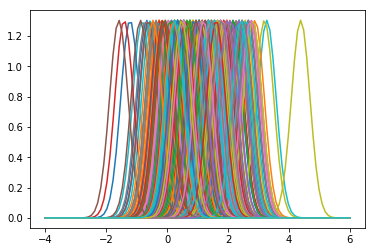

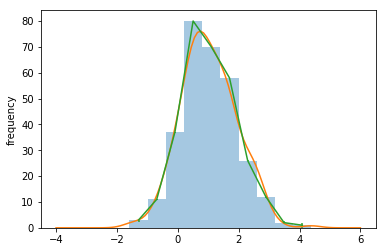

In [7]:
import numpy as np
from scipy import integrate
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
mean = 1.0
x = np.random.randn(300) + mean

hist_results = plt.hist(x, bins=10)
plt.clf()
bins = (hist_results[1][:-1] + hist_results[1][1:])/2
yerr = hist_results[0] ** -0.5
n = hist_results[0]
area = integrate.trapz(n, dx=bins[1]-bins[0])

std_default = 1.06 * x.std() * (x.size ** -0.2) 
f = []
for i in x:
    f.append(stats.norm(loc=i, scale=std_default))      

x_loc = np.linspace(-4,6,100) 
gaussians = []
for j in f:
    gaussians.append(j.pdf(x_loc)) 
    plt.plot(x_loc, j.pdf(x_loc))
    
plt.show()

m = np.array(gaussians) 
sums = m.sum(axis=0)
area2 = integrate.trapz(sums, dx=x_loc[1]-x_loc[0])
plt.hist(x, bins=10, alpha=0.4)
plt.plot(x_loc, sums*(area/area2))
plt.errorbar(x=bins, y=n, yerr=yerr )
plt.ylabel("frequency")
plt.yticks()
plt.show()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2019-01-18 08:32:58--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2019-01-18 08:32:58--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4af0f9fd6478a4c7dbaef356d2.dl.dropboxusercontent.com/cd/0/inline/AZnVdVtLEC9uSsUkXScI1xbHhWabVhvD9aPtoNJ7c2ChFOO6Jjdh5I3xNHlriw98t7AOV9kWbIBLnXrICtJ8ljkpO_nQTFUDT-BVg8cTlUtWgWppOwcVWqPBU3tOfQDXAp8E7VYADnfZvzTbV9QdnyGi9eD80No_GhSaz6qSOKqCPUGPmsIjmfbkPe_aAe1eP_4/file# [following]
--2019-01-18 08:32:59--  https://uc4af0f9fd6478a4c7dbaef356d2.dl.dropboxusercontent.com/cd

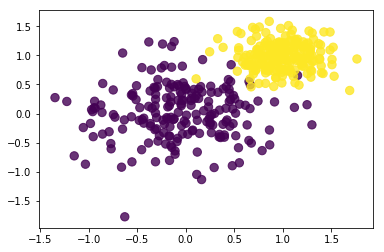

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


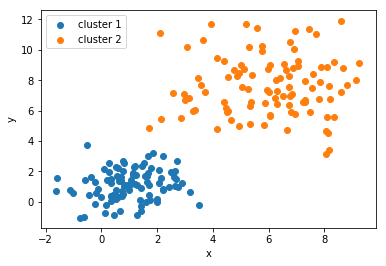

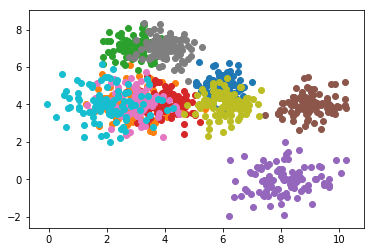

In [19]:
sigma1, sigma2 = 1,2
center1 = (1,1)                                                                                    
center2 = (3,4) 
points = np.random.normal(size=(100,4))
points[:,0] += center1[0]
points[:,1] += center1[1]
points[:,2] += center2[0]
points[:,3] += center2[1]
points[:,:2] *= sigma1
points[:,2:] *= sigma2

plt.scatter(points[:,0], points[:,1], label='cluster 1')
plt.scatter(points[:,2], points[:,3], label='cluster 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

n = 10
sigmas = np.random.rand(n)    
centers = np.random.randint(0,10,size=(n, 2))
points = np.random.normal(size=(100, 2*n))
points[:,::2] *= sigmas
points[:,1::2] *= sigmas
points[:,0::2] += centers[:,0]
points[:,1::2] += centers[:,1]
for i in range(n):
    plt.scatter(points[:,i*2],points[:,i*2+1])


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [22]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2019-01-18 08:42:10--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2019-01-18 08:42:10--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc94fd24a1077737064566e1089.dl.dropboxusercontent.com/cd/0/inline/AZlHTSHoHlhyB38MT_cWBlBKAQPIohdJ49o2941QbQfBVP26klr1M_V0flshNioFbPZd3WWd3iyyDZVsG6OsnjjZsH-5RykQ8PfCs2tn1js783OBLc9Qy1ieRSadEnlXtdUB0It9hvfyPHgoyaomfSdQ96jSr_WzpqMHzNGAZXPApTiwyjNiytjfSHjNrHE_ecw/file# [following]
--2019-01-18 08:42:11--  https://ucc94fd24a1077737064566e1089.dl.dropboxusercontent.com/cd/0/inline/AZlHTSHoHlhyB38MT_cWBlBKAQPIohdJ

In [66]:
import pandas as pd
import seaborn as sns
data = np.load("residuals_261.npy")
df = [data[np.newaxis][0]["residuals"],data[np.newaxis][0]["distances"]]
df = pd.DataFrame(df)
df = df.transpose()
df.columns = ["residuals","distances"]
df1 = df[abs(df["residuals"])<2]

In [70]:
sc.stats.linregress(df1["distances"], df1["residuals"])

LinregressResult(slope=0.003259770122030569, intercept=-0.1543281676306946, rvalue=0.043403510522558926, pvalue=8.717037183577096e-06, stderr=0.0007327014008445787)

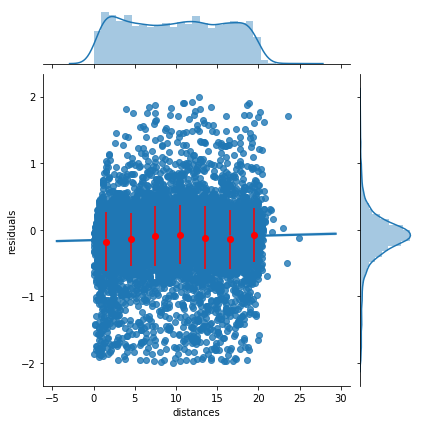

In [94]:
x = np.linspace(0,21,8)
binned = []
k = 0 
for j in x[1:]: 
    binned.append(df1.query("distances<{} & distances>={}".format(j,k))["residuals"].values) 
    k = j 
      
y = list(map(lambda p: p.mean(),binned))
yerr = list(map(lambda p: p.std(),binned))

joint = sns.jointplot("distances", "residuals", data=df1, kind="reg")
joint.ax_joint.errorbar((x[:-1]+x[1:])/2, y, yerr=yerr, fmt='o', c='r')

plt.show()